In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
df=pd.read_csv('Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [21]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [23]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Exploratory Data Analysis


In [26]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

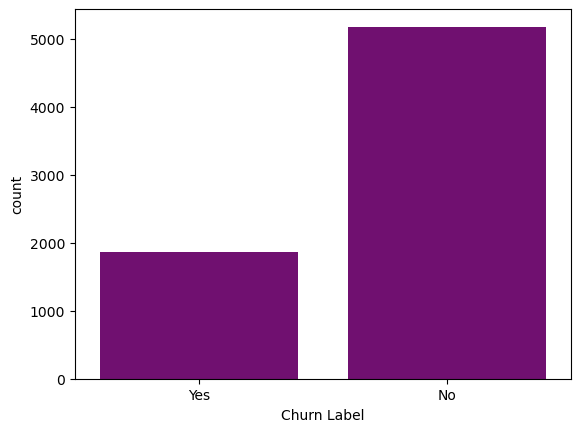

In [78]:
sns.countplot(x='Churn Label', data=df,color='purple')
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## One-hot encoding and Converting to numeric

In [33]:
# one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Payment Method'])

df_encoded['Tenure Months'] = pd.to_numeric(df_encoded['Tenure Months'], errors='coerce')
df_encoded['Total Charges'] = pd.to_numeric(df_encoded['Total Charges'], errors='coerce')

# Identify non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
df_encoded = df_encoded.drop(non_numeric_cols, axis=1)

In [35]:
df_encoded.head()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,90003,33.964131,-118.272783,2,53.85,108.15,1,86,3239
1,1,90005,34.059281,-118.307420,2,70.70,151.65,1,67,2701
2,1,90006,34.048013,-118.293953,8,99.65,820.50,1,86,5372
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,1,84,5003
4,1,90015,34.039224,-118.266293,49,103.70,5036.30,1,89,5340


# Standardize numerical features


In [38]:
scaler = StandardScaler()
numerical_cols = ['Tenure Months', 'Total Charges']  # Adjust based on your dataset
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.isnull().sum()
df_encoded['Total Charges'].fillna(df_encoded['Total Charges'].mean(), inplace=True)

## Scatter Plot of Tenure Months vs Total charges with churn value



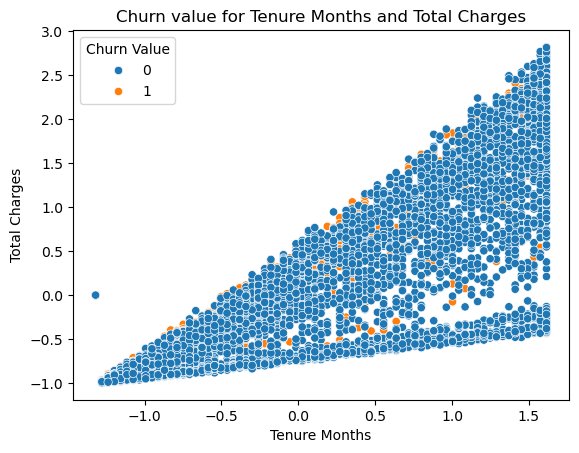

In [41]:
sns.scatterplot(x='Tenure Months', y='Total Charges', hue='Churn Value', data=df_encoded)
plt.xlabel('Tenure Months')
plt.ylabel('Total Charges')
plt.title('Churn value for Tenure Months and Total Charges')
plt.show()

## Heatmap of Feature Correlations

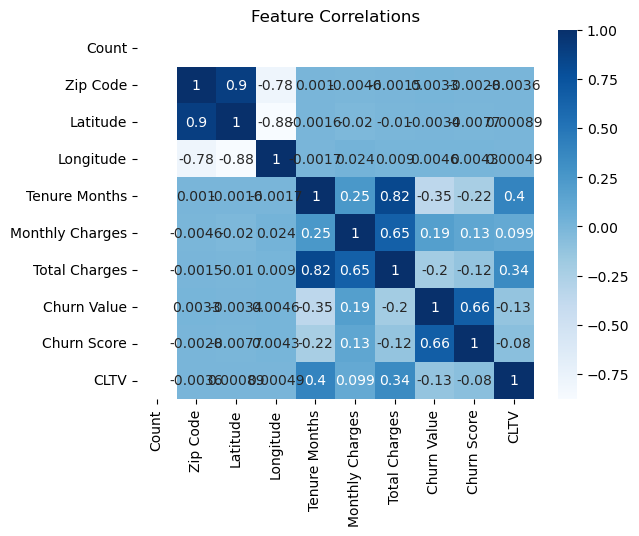

In [44]:
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Feature Correlations')
plt.show()

* This implies a positive correlation

## Splitting dataset into training and testing


In [46]:
X = df_encoded.drop(columns=['Churn Value'])
y = df_encoded['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8878637331440739

In [55]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8071065989847716
Recall: 0.795


In [57]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.96


## Confusion Matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

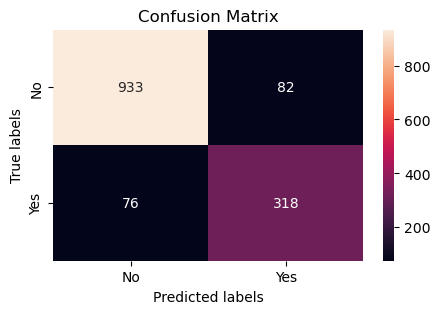

In [60]:
cm = confusion_matrix(y_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [62]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.92      0.92      0.92      1009
         Yes       0.81      0.80      0.80       400

    accuracy                           0.89      1409
   macro avg       0.86      0.86      0.86      1409
weighted avg       0.89      0.89      0.89      1409



# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()
# Train the model
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred)

0.8800567778566359

In [69]:
confusion_matrix(y_test, y_pred)

array([[920,  89],
       [ 80, 320]], dtype=int64)